In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spm1d

In [2]:
filepath = "RELIANCE_2010-01-012021-08-30.csv"
data = pd.read_csv(filepath)
data = data.sort_values('Date')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2010-01-04,1091.1,1091.1,1021.85,1075.50,17520006,RELIANCE
1,2010-01-05,1149.9,1149.9,1065.40,1070.70,4890040,RELIANCE
2,2010-01-06,1079.9,1094.5,1070.65,1088.00,5415538,RELIANCE
3,2010-01-07,1088.0,1115.0,1078.00,1106.05,5988404,RELIANCE
4,2010-01-08,1108.0,1113.8,1096.00,1103.15,3453926,RELIANCE


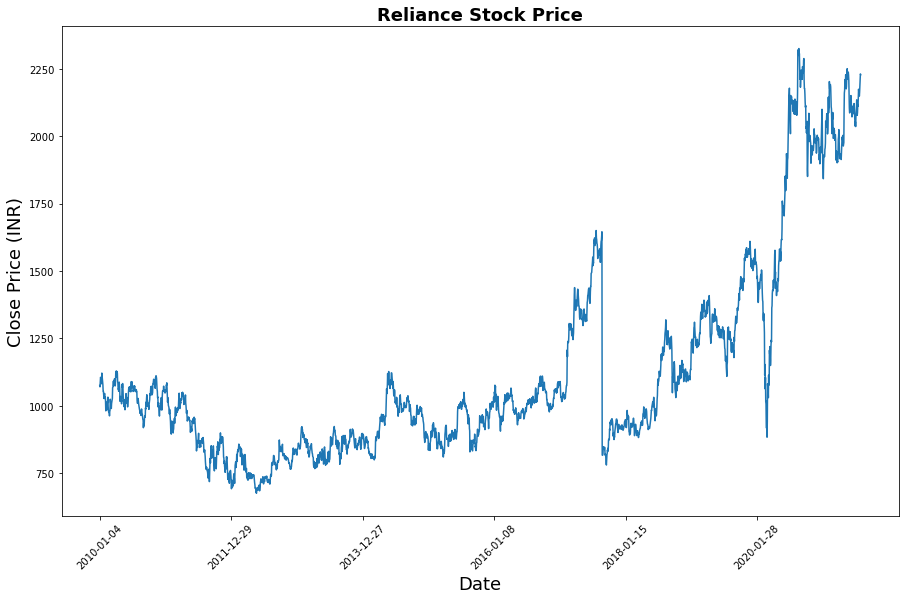

In [3]:
plt.figure(figsize = (15,9))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title("Reliance Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.show()

In [4]:
price = data[['Close']]

In [5]:
def splitData(ts):

    test_set_size = int(np.round(0.2*len(ts)));
    train_set = ts[:-test_set_size]    
    test_set = ts[-test_set_size:]

    return train_set, test_set

In [6]:
train_set, test_set = splitData(price['Close'].values)

In [17]:
yA = [1, 2, 4, 1, 2, 3, 2, 2]
yB = [3, 2, 3, 4, 2, 5, 4, 3]

In [19]:
t = spm1d.stats.ttest2(yA, yB)
ti = t.inference(0.05)
print(ti)
# ti.plot()

SPM{T} (0D) inference
   SPM.z        :  -2.22046
   SPM.df       :  (1, 13.978)
Inference:
   SPM.alpha    :  0.050
   SPM.zstar    :  2.14510
   SPM.h0reject :  True
   SPM.p        :  0.04343




In [21]:
tn = spm1d.stats.nonparam.ttest2(yA, yB)
tni = tn.inference(0.05, iterations=1000)
print(tni)
# tni.plot()

SnPM{t} inference (0D)
   SPM.z              :  -2.220
   SnPM.nPermUnique   :  12870 permutations possible
Inference:
   SnPM.nPermActual   :  1000 actual permutations
   SPM.alpha          :  0.050
   SPM.zstar (lower)  :  -2.98593
   SPM.zstar (upper)  :  2.22046
   SPM.two_tailed     :  True
   SPM.h0reject       :  False
   SPM.p              :  0.052



In [7]:
tn = spm1d.stats.ttest2(train_set, test_set)
tni = tn.inference(0.05)
print(tni)

SPM{T} (0D) inference
   SPM.z        :  -71.78627
   SPM.df       :  (1, 1657.658)
Inference:
   SPM.alpha    :  0.050
   SPM.zstar    :  1.96140
   SPM.h0reject :  True
   SPM.p        :  0.00000




In [8]:
tn = spm1d.stats.nonparam.ttest2(train_set, test_set)
tni = tn.inference(0.05, iterations=1000)
print(tni)

SnPM{t} inference (0D)
   SPM.z              :  -71.786
   SnPM.nPermUnique   :  -1 permutations possible
Inference:
   SnPM.nPermActual   :  1000 actual permutations
   SPM.alpha          :  0.050
   SPM.zstar (lower)  :  -2.20955
   SPM.zstar (upper)  :  2.21670
   SPM.two_tailed     :  True
   SPM.h0reject       :  True
   SPM.p              :  0.001



In [30]:
train_set= train_set[:579].reshape(-1,1)
test_set = test_set.reshape(-1, 1)

In [23]:
train_set = train_set.reshape(-1,1)

In [26]:
train_new = np.concatenate((train_set, train_set, train_set), axis=1).reshape(3, -1)

In [31]:
test_new = np.concatenate((test_set, test_set, test_set), axis=1).reshape(3, -1)

In [32]:
train_new.shape, test_new.shape

((3, 2316), (3, 579))

In [40]:
yA = np.random.randn(1,101)
yB = np.random.randn(1,101)

In [41]:
yA = np.array(yA).reshape(1,-1)
yB = np.array(yB).reshape(1,-1)

In [1]:
# tn = spm1d.stats.nonparam.ttest2(yA, yB)
# tni = tn.inference(0.05,  iterations=2)
# print(tni)
# tni.plot()